In [37]:
import tarfile
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [38]:
MS_tarfile = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Apr-proteomics-grouped/proteomics_results_grouped_Apr13-2023.tar.gz'

20230413-combine-fractions/ohsu/TCGA_A2-A0D2_C8-A12U_AR-A1AS_117C_W_BI_20131010_H-PM/combine.peptides.txt
(560901, 18)
(278246, 18)
count    278246.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: xcorr rank, dtype: float64


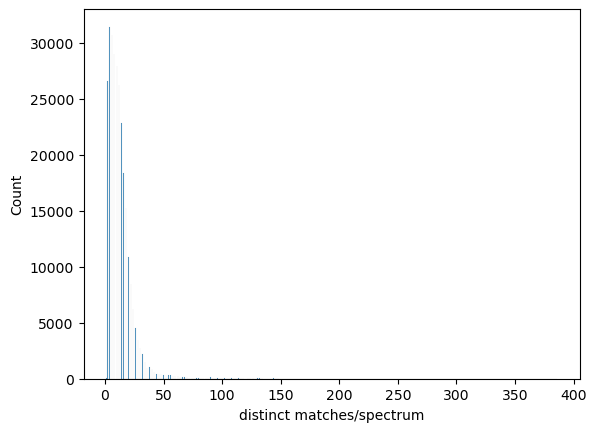

20230413-combine-fractions/eth/TCGA_A2-A0D2_C8-A12U_AR-A1AS_117C_W_BI_20131010_H-PM/combine.peptides.txt
(68961, 18)
(34228, 18)
count    34228.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: xcorr rank, dtype: float64


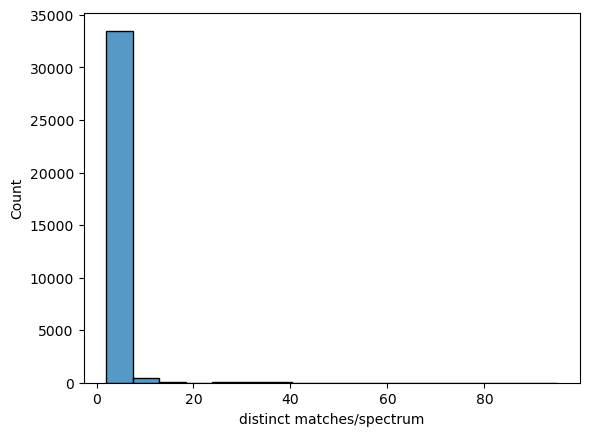

In [68]:
member_list = {'ohsu':'20230413-combine-fractions/ohsu/TCGA_A2-A0D2_C8-A12U_AR-A1AS_117C_W_BI_20131010_H-PM/combine.peptides.txt',
               'eth': '20230413-combine-fractions/eth/TCGA_A2-A0D2_C8-A12U_AR-A1AS_117C_W_BI_20131010_H-PM/combine.peptides.txt'}
msms = {}
for key, member in member_list.items():
    with tarfile.open(MS_tarfile) as tar: 
        #print(tar.getmembers())
        print(member)
        f = tar.extractfile(member)
        ms = pd.read_csv(f, sep='\t')

        print(ms.shape)


        print(ms.loc[ms['target/decoy'] == 'target'].shape)

        print(ms.loc[ms['target/decoy'] == 'target', 'xcorr rank'].describe())

        msms[key] = ms
        sns.histplot(ms.loc[ms['target/decoy'] == 'target', 'distinct matches/spectrum'])
        plt.show()

In [70]:
msms['ohsu'].loc[msms['ohsu']['target/decoy'] == 'target'].head()

,file,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,delta_cn,delta_lcn,xcorr score,xcorr rank,distinct matches/spectrum,sequence,modifications,unmodified sequence,protein id,flanking aa,target/decoy,original target sequence
1,curFile,11120,2,344.6978,687.3810,687.4037,0.002604,0,0.019712,1,2,VAVAGQ,1_S_144.1021_n,VAVAGQ,"pepID-106611(1),pepID-106612(1),pepID-106610(1...","--,--,--,--",target,VAVAGQ
2,curFile,5640,2,346.2055,690.3965,690.4034,0.252543,0,0.259413,1,2,SSLAGL,1_S_144.1021_n,SSLAGL,pepID-105831(1),--,target,SSLAGL
3,curFile,25595,2,347.6806,693.3467,693.3415,0.000572,0,-0.008053,1,2,ASQSGT,1_S_144.1021_n,ASQSGT,pepID-112005(1),--,target,ASQSGT
5,curFile,17385,2,359.2077,716.4009,716.3826,0.000248,0,-0.004157,1,2,VTAPEG,1_S_144.1021_n,VTAPEG,pepID-109063(1),--,target,VTAPEG
8,curFile,6073,2,362.2167,722.4189,722.3932,0.149453,0,0.277899,1,2,VATSTT,1_S_144.1021_n,VATSTT,pepID-101771(1),--,target,VATSTT


In [71]:
eth_seq = set(msms['eth']['original target sequence'])

In [77]:
ohsu_seq = set(msms['ohsu']['original target sequence'])

In [103]:
len(eth_seq)

580

In [104]:
len(ohsu_seq)

25808

In [78]:
len(eth_seq.intersection(ohsu_seq))

394

In [79]:
len(eth_seq.difference(ohsu_seq))

186

In [80]:
len(ohsu_seq.difference(eth_seq))

25414

In [ ]:
# This are only the matches. For 4000 kmers OHSU and 1000 kmer ETH much more OHSU kmer got the validation. Was the inclusion of kmers right?

In [76]:
eth_seq.intersection(ohsu_seq)

{'AAAAPGASPSPGGDAAWSEAGPGPGPWR',
 'AAGSEGSQGR',
 'ACFLGFVFGCGTLLSFSQSSWSHFGWSHLVHPYTMISVP',
 'ACPLGSQLPPSSPSTSAWR',
 'ADGTFDWR',
 'AEDYEENLVILIFAEVTQEVEVAR',
 'AEEIISL',
 'AEFHSISR',
 'AEGPEVDMNLPK',
 'AELIQIPEDILQLLILLR',
 'AELQALTEQNLAHEGR',
 'AFNWSSTH',
 'AFSAEVQALPSPYQLR',
 'AGAAAAGTAPTHAVR',
 'AGAENMVATPLASTSNSLNGDALTFTTTFTLTFFPHDCR',
 'AGDELAYTFT',
 'AGIPEEFNVFNLIQEMR',
 'AGLAFPR',
 'AGPEDGR',
 'AHDDANVVR',
 'AHLVAVAER',
 'AIACQSVESSTR',
 'AIGVLTSGGDAQGLGSQR',
 'ALGLQVCR',
 'ALGVNLVPLVK',
 'ALHSFINSCDVPGVYK',
 'ALLASPGGGPPAK',
 'ALLDLSLYR',
 'ALLTSLAQHLLSDPR',
 'ALMNTQVACMQLINALVTSPDDLDFR',
 'ALQPSTAYYPAGTQLFMNYTAYYPR',
 'ALSSSADDASLVNASISSSVSLVSTPR',
 'AMLSVALDALAAGVQEESSTHK',
 'AMSTISQER',
 'APHGCPEILPSGDLLIPVGVMQPLTLR',
 'APNGHR',
 'APWLCWCSWQR',
 'AQAHWR',
 'AQELDALDNSHPIELSVEGFAVDK',
 'AQSEAEEAK',
 'ASQMEMK',
 'ASTVNYCGLNEISETESFSVTQAGVQWHNHSSLQPR',
 'ASVQLYFAQCWCVVLYSMNCLMTVLISSLITTSK',
 'ATGLPAAQVQAF',
 'ATTPQLTDVSEGPFLILCSLHR',
 'ATTTCPS',
 'AVAMGHSQDR',
 'AVANQTSFR',
 'A

In [101]:
kmer = 'AAAAPGASPSPGGDAAWSEAGPGPGPWR'
display(msms['eth'].loc[(msms['eth']['original target sequence'] == kmer) & 
                        (msms['eth']['target/decoy'] == 'target')])

,file,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,delta_cn,delta_lcn,xcorr score,xcorr rank,distinct matches/spectrum,sequence,modifications,unmodified sequence,protein id,flanking aa,target/decoy,original target sequence
2559,curFile,10974,4,673.0597,2688.2097,2688.2802,0.053362,0,0.199196,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
16898,curFile,34559,4,673.1017,2688.3776,2688.2802,0.278417,0,0.670063,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
16926,curFile,34555,3,897.1309,2688.3709,2688.2802,0.131811,0,0.494077,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
19684,curFile,23928,5,538.6712,2688.3196,2688.2802,0.102447,0,0.144594,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
19750,curFile,35398,3,897.1307,2688.3702,2688.2802,0.022759,0,0.412385,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
19757,curFile,27670,4,673.0717,2688.2578,2688.2802,0.009474,0,0.720620,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
25684,curFile,19492,4,673.0775,2688.2810,2688.2802,0.115821,0,0.440289,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
28430,curFile,36030,3,897.1116,2688.3129,2688.2802,0.007202,0,0.117561,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
39893,curFile,40120,3,897.1158,2688.3255,2688.2802,0.081449,0,0.775653,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
48589,curFile,34513,3,897.1127,2688.3162,2688.2802,0.098438,0,0.409490,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR


In [102]:
display(msms['ohsu'].loc[(msms['ohsu']['original target sequence'] == kmer) & 
                        (msms['ohsu']['target/decoy'] == 'target')])

,file,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,delta_cn,delta_lcn,xcorr score,xcorr rank,distinct matches/spectrum,sequence,modifications,unmodified sequence,protein id,flanking aa,target/decoy,original target sequence
20045,curFile,10974,4,673.0597,2688.2097,2688.2802,0.020907,0,0.199196,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
136635,curFile,34559,4,673.1017,2688.3776,2688.2802,0.043754,0,0.670063,1,12,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
160811,curFile,19826,4,673.0789,2688.2866,2688.2802,0.001337,0,0.418765,1,6,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
208330,curFile,32616,3,897.0812,2688.2217,2688.2802,0.170697,0,0.569248,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
326755,curFile,40120,3,897.1158,2688.3255,2688.2802,0.156946,0,0.775653,1,10,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
395015,curFile,35104,4,673.0612,2688.2158,2688.2802,0.093951,0,0.136053,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
416884,curFile,35268,3,897.1101,2688.3085,2688.2802,0.210926,0,0.602313,1,10,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
417126,curFile,24942,3,897.0726,2688.1959,2688.2802,0.001464,0,0.289109,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR


In [116]:
display(msms['ohsu'].loc[
                          (msms['ohsu']['sequence'] == 'AAAAPGASPSPGGDAAWSEAGPGPGPWR')])

,file,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,delta_cn,delta_lcn,xcorr score,xcorr rank,distinct matches/spectrum,sequence,modifications,unmodified sequence,protein id,flanking aa,target/decoy,original target sequence
20045,curFile,10974,4,673.0597,2688.2097,2688.2802,0.020907,0,0.199196,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
136635,curFile,34559,4,673.1017,2688.3776,2688.2802,0.043754,0,0.670063,1,12,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
160811,curFile,19826,4,673.0789,2688.2866,2688.2802,0.001337,0,0.418765,1,6,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
208330,curFile,32616,3,897.0812,2688.2217,2688.2802,0.170697,0,0.569248,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
326755,curFile,40120,3,897.1158,2688.3255,2688.2802,0.156946,0,0.775653,1,10,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
395015,curFile,35104,4,673.0612,2688.2158,2688.2802,0.093951,0,0.136053,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
416884,curFile,35268,3,897.1101,2688.3085,2688.2802,0.210926,0,0.602313,1,10,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
417126,curFile,24942,3,897.0726,2688.1959,2688.2802,0.001464,0,0.289109,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-113813(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR


In [114]:
display(msms['eth'].loc[(msms['eth']['sequence'] == 'AAAAPGASPSPGGDAAWSEAGPGPGPWR')])

,file,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,delta_cn,delta_lcn,xcorr score,xcorr rank,distinct matches/spectrum,sequence,modifications,unmodified sequence,protein id,flanking aa,target/decoy,original target sequence
2559,curFile,10974,4,673.0597,2688.2097,2688.2802,0.053362,0,0.199196,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
16898,curFile,34559,4,673.1017,2688.3776,2688.2802,0.278417,0,0.670063,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
16926,curFile,34555,3,897.1309,2688.3709,2688.2802,0.131811,0,0.494077,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
19684,curFile,23928,5,538.6712,2688.3196,2688.2802,0.102447,0,0.144594,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
19750,curFile,35398,3,897.1307,2688.3702,2688.2802,0.022759,0,0.412385,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
19757,curFile,27670,4,673.0717,2688.2578,2688.2802,0.009474,0,0.720620,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
25684,curFile,19492,4,673.0775,2688.2810,2688.2802,0.115821,0,0.440289,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
28430,curFile,36030,3,897.1116,2688.3129,2688.2802,0.007202,0,0.117561,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
39893,curFile,40120,3,897.1158,2688.3255,2688.2802,0.081449,0,0.775653,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
48589,curFile,34513,3,897.1127,2688.3162,2688.2802,0.098438,0,0.409490,1,2,AAAAPGASPSPGGDAAWSEAGPGPGPWR,1_S_144.1021_n,AAAAPGASPSPGGDAAWSEAGPGPGPWR,pepID-155(1),--,target,AAAAPGASPSPGGDAAWSEAGPGPGPWR
